In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations, permutations
from scipy import sparse

In [2]:
class mixed_heider:
    def set_system(self, nodes_count, enmity_ratio, delay):
        self.nc, self.er, self.delay = (nodes_count, enmity_ratio, delay)
        self.initiate()

    def initiate(self):
        self.create_network()
        self.total_tri_energy()

    def create_network(self):
        links = np.array(list(combinations(np.arange(self.nc), 2)))

        self.lc = len(links)
        signs = np.random.choice(a=[-1, 1],
                                 size=self.lc,
                                 p=[self.er, 1 - self.er])
        adj = sparse.coo_matrix((signs, (links[:, 0], links[:, 1])),
                                (self.nc, self.nc)).toarray()
        self.adj_mat = adj + adj.T

    def total_tri_energy(self):
        self.tc = len(list(combinations(np.arange(self.nc), 3)))
        randRange = 2 * self.delay if self.delay > 0 else 1;
        self.state_array = np.c_[
            list(combinations(np.arange(self.nc), 3)),
            -np.random.randint(randRange, size=self.tc)]
        energy_part = np.matmul(self.adj_mat, self.adj_mat)
        energy_mat = np.multiply(self.adj_mat, energy_part)
        self.tri_energy = -np.sum(energy_mat) / 6

    def permute_nodes(self, array):
        return np.array(list(permutations(array, 3))[:3])

    # dynamic
    def balanceTimer(self, link, time):
        indices = list(range(self.nc))
        indices.remove(link[1])
        indices.remove(link[0])
        for i in indices:
            sign = \
            self.adj_mat[link[0],link[1]] * \
            self.adj_mat[link[0], i] * \
            self.adj_mat[i, link[1]]
            if sign == -1:
                dd = [link[0], link[1], i]
                dd.sort()
                row = np.argwhere(
                    (self.state_array[:, :-1] == dd).all(axis=1))[0][0]
                self.state_array[row, 3] = time

    def checker(self, link, time):
        linkEnergy = 0
        indices = list(range(self.nc))
        indices.remove(link[1])
        indices.remove(link[0])
        for i in indices:
            dd = [link[0], link[1], i]
            dd.sort()
            row = np.argwhere(
                (self.state_array[:, :-1] == dd).all(axis=1))[0][0]
            if (time - self.state_array[row, 3] <= self.delay):
                linkEnergy += 1
            else:
                linkEnergy -= 1
        return linkEnergy

    def flipper(self, time):
        link = np.random.choice(range(self.nc), 2, replace=False)
        tri_energy_m = -np.inner(
            self.adj_mat[:, link[0]],
            self.adj_mat[:, link[1]]) * self.adj_mat[link[0], link[1]]
        tri_energy = self.checker(link, time)
        delta_E = tri_energy
        new_sgn = -np.sign(delta_E)
        decision_factor = new_sgn - 1
        self.adj_mat[link[0],link[1]] = self.adj_mat[link[1],link[0]] = \
                        new_sgn * self.adj_mat[link[0],link[1]]
        self.balanceTimer(link, time)
        self.tri_energy += decision_factor * tri_energy_m

In [14]:
nodes_count = 21  # number of nodes (must be integer)
enmity_ratio = 1  # a real number between 0 and 1 that
# shows initial ratio of enmity in network
# delay = 21
time_steps = nodes_count**3

In [15]:
trngl_energy_ts = []

In [16]:
mh = mixed_heider()

In [17]:
mh.set_system(nodes_count, enmity_ratio, delay)

In [18]:
for t in range(time_steps):
    mh.flipper(t)
    trngl_energy_ts.append(mh.tri_energy / mh.tc)

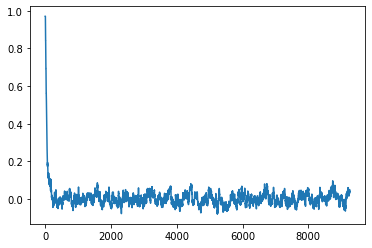

In [13]:
plt.plot(trngl_energy_ts)

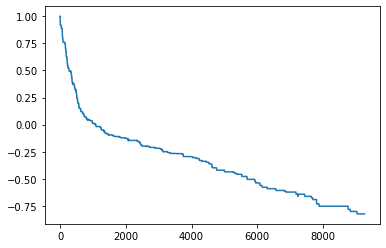

In [19]:
plt.plot(trngl_energy_ts)

In [24]:
delays = [1,2,4,8,16]

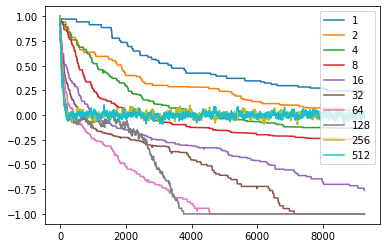

In [21]:
for i in range(10):
    delay = 2 ** i
    trngl_energy_ts = []
    mh = mixed_heider()
    mh.set_system(nodes_count, enmity_ratio, delay)
    for t in range(time_steps):
        mh.flipper(t)
        trngl_energy_ts.append(mh.tri_energy / mh.tc)
    plt.plot(trngl_energy_ts,label=str(delay))
plt.legend()
plt.show()

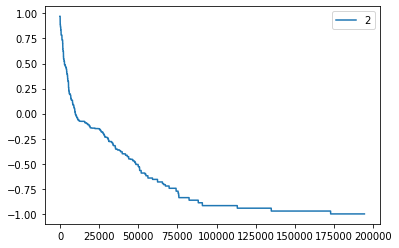

In [26]:
# for delay in delays:
delay = 2
trngl_energy_ts = []
mh = mixed_heider()
mh.set_system(nodes_count, enmity_ratio, delay)
for t in range(nodes_count ** 4):
    mh.flipper(t)
    trngl_energy_ts.append(mh.tri_energy / mh.tc)
plt.plot(trngl_energy_ts,label=str(delay))
plt.legend()
plt.show()

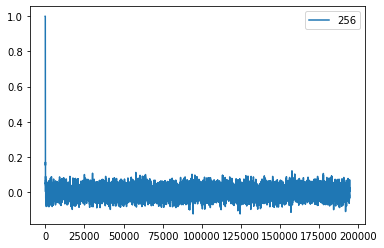

In [27]:
# for delay in delays:
delay = 256
trngl_energy_ts = []
mh = mixed_heider()
mh.set_system(nodes_count, enmity_ratio, delay)
for t in range(nodes_count ** 4):
    mh.flipper(t)
    trngl_energy_ts.append(mh.tri_energy / mh.tc)
plt.plot(trngl_energy_ts,label=str(delay))
plt.legend()
plt.show()

In [31]:
np.random.randint(1, size=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
a = [3,1,2]
a.sort()

In [72]:
np.argwhere((aa[:,:-1] == a).all(axis=1))

array([[91]])

In [75]:
aa[90,:]

array([ 0., 13., 14., -1.])

In [61]:
aa[:,:-1]

array([[ 0.,  1.,  2.],
       [ 0.,  1.,  3.],
       [ 0.,  1.,  4.],
       ...,
       [11., 12., 14.],
       [11., 13., 14.],
       [12., 13., 14.]])

In [114]:
aaa = list(range(10))

In [119]:
aaa.remove((1,2))

ValueError: list.remove(x): x not in list

In [147]:
np.random.randint(20,size=)

44